In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/IIDonaji/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

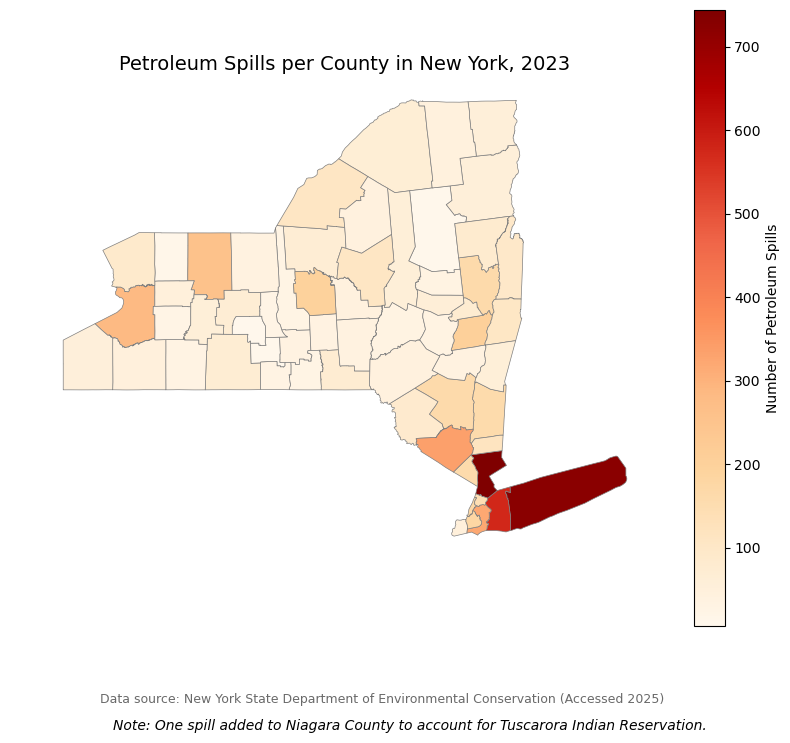

In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Set up display options when looking at data frames
pd.set_option("display.max.column", None)

# NY spill Incidents (CSV)
fp = "data/Spill_Incidents_20251107.csv"
spills = pd.read_csv(fp)

# US counties shapefile
fp = os.path.join("data","tl_2023_us_county", "tl_2023_us_county.shp")
counties = gpd.read_file(fp)

# Clean and filter data
# change column names to lower case, remove trailing spaces and add `_` to spacing
spills.columns = spills.columns.str.strip().str.lower().str.replace(" ", "_")

# spill_date, received_date, and close_date to Dates 
spills[['spill_date', 'received_date','close_date']] = spills[['spill_date', 'received_date','close_date']].apply(pd.to_datetime)

# select for spills bettween Jaunary 1st, and October 31st, 2023
petr_23 = spills[
    (spills['spill_date'] >= '2023-01-01') &
    (spills['spill_date'] <= '2023-10-31') &
    (spills['material_family'] == 'Petroleum')
]

# aggerate petrolum spills per county
spills_per_county = (
petr_23.groupby('county').size().reset_index(name= "n_spills")
)

spills_per_county['n_spills'] = spills_per_county['n_spills'].astype(int)
spills_per_county = spills_per_county.sort_values('county').reset_index(drop= True)

# Lowercase all column names
counties.columns = counties.columns.str.lower()

# select all New York counties (FIPS code 36)
ny_counties = counties[counties['statefp'] == '36']

# update 'St Lawrence' to 'St. Lawrence'
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

# Rename column to 'county' for consistency
ny_counties = ny_counties.rename(columns={'name': 'county'})

# Merge counties and spills per county dataframes
ny_counties = ny_counties.merge(spills_per_county, on='county', how='inner')

# Add a spill to Niagara 
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] +=1

# Plot number of petroleum spill per county in the state of New York in 2023
fig, ax = plt.subplots(figsize=(10, 8))
ny_counties.plot(
column= 'n_spills',
cmap= 'OrRd',
legend= True,
edgecolor= 'gray',
linewidth= 0.5,
ax=ax,
legend_kwds={
        'label': "Number of Petroleum Spills", 
        'orientation': "vertical"              
    })
ax.set_title("Petroleum Spills per County in New York, 2023", fontsize=14)
ax.axis('off')
plt.annotate(
"Data source: New York State Department of Environmental Conservation (Accessed 2025)",
xy=(0.1, 0.05), xycoords= 'figure fraction', fontsize= 9, color= 'dimgray')
# Add note about Tuscarora correction
plt.figtext(
    0.5, -0.02,
    "Note: One spill added to Niagara County to account for Tuscarora Indian Reservation.",
    wrap=True, ha='center', fontsize=10, style='italic'
)
plt.show()

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

## 3. Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Set up display options when looking at data frames
pd.set_option("display.max.column", None)

fp = "data/Spill_Incidents_20251107.csv"
spills = pd.read_csv(fp)

fp = os.path.join("data","tl_2023_us_county", "tl_2023_us_county.shp")
counties = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [4]:
#a. Check the dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


In [5]:
#b. Check the data types of the columns
spills.dtypes

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [6]:
#c. Check the unique values in the `material_family` column
spills["Material Family"].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
#d. Check the unique values in the `county` column
spills['County'].unique

<bound method Series.unique of 0         Westchester
1              Queens
2              Queens
3               Bronx
4            Sullivan
             ...     
563654       New York
563655       New York
563656       New York
563657       Richmond
563658         Queens
Name: County, Length: 563659, dtype: object>

e.
From the perliminary exploration of the spills dataset, I observed that the dataframe contains information on spill incidents across different counties. Columns include details such as spill date, county, and material family involved in each event. By checking data types, I confirmed that most variables are stored as objects, while the date column should be convereted to a datetime format for easier filter and analysis. The Material Family column stores several categories that may be important for later analysis. The county column revealed some inconsistenceies in naming conventions, which will need to be cleaned. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [8]:
# change column names to lower case, remove trailing spaces and add `_` to spacing
spills.columns = spills.columns.str.strip().str.lower().str.replace(" ", "_")
spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [9]:
# quantity and recovered to integer64
spills[['quantity', 'recovered']] = (
    spills[['quantity', 'recovered']].replace(",", "", regex = True)
    .apply(pd.to_numeric, errors= "coerce").round().astype("Int64")
)

# check convertion
print(spills[['quantity', 'recovered']].dtypes)

quantity     Int64
recovered    Int64
dtype: object


In [10]:
# spill_date, received_date, and close_date to Dates 
spills[['spill_date', 'received_date','close_date']] = spills[['spill_date', 'received_date','close_date']].apply(pd.to_datetime)

# check convertion
print(spills[['spill_date', 'received_date','close_date']].dtypes)

spill_date       datetime64[ns]
received_date    datetime64[ns]
close_date       datetime64[ns]
dtype: object


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [11]:
# select for spills bettween Jaunary 1st, and October 31st, 2023
petr_23 = spills[
    (spills['spill_date'] >= '2023-01-01') &
    (spills['spill_date'] <= '2023-10-31') &
    (spills['material_family'] == 'Petroleum')
]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [12]:
print(f"petr_23 contains spills from year(s) {petr_23.spill_date.dt.year.unique()} and month(s) {petr_23.spill_date.dt.month.unique()}")

petr_23 contains spills from year(s) [2023] and month(s) [ 6  8  9  7  1  2  3 10  5  4]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [13]:
assert(petr_23['material_family'] == 'Petroleum').all(), "Error: Non-petroleum spills found in petr_23"
print("Test passed: all rows in petr_23 are petroleum spills.")

Test passed: all rows in petr_23 are petroleum spills.


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [14]:
# check petr_23 county column for duplicate or inconsistent naming
petr_23['county'].unique()

array(['Onondaga', 'Tioga', 'Monroe', 'Lewis', 'Cortland', 'Erie',
       'Clinton', 'Bronx', 'Queens', 'Essex', 'Oneida', 'Oswego',
       'Suffolk', 'Steuben', 'Wayne', 'Albany', 'Livingston', 'Franklin',
       'Kings', 'Nassau', 'Cattaraugus', 'Jefferson', 'Niagara',
       'Ontario', 'Chenango', 'Broome', 'Chemung', 'Greene', 'Schuyler',
       'New York', 'Orange', 'Saratoga', 'Rensselaer', 'Rockland',
       'Montgomery', 'Schoharie', 'Westchester', 'Washington', 'Herkimer',
       'Ulster', 'Putnam', 'Sullivan', 'St Lawrence', 'Genesee',
       'Tompkins', 'Allegany', 'Delaware', 'Dutchess',
       'New Jersey - Region 2', 'Columbia', 'Chautauqua', 'Wyoming',
       'Madison', 'Fulton', 'Otsego', 'Schenectady', 'Warren', 'Hamilton',
       'Seneca', 'Cayuga', 'Richmond', 'Orleans',
       'Tuscarora Indian Reservation', 'Yates'], dtype=object)

In [15]:
# check for missing values
petr_23['county'].isna().sum()

0

In [16]:
# aggerate petrolum spills per county
spills_per_county = (
petr_23.groupby('county').size().reset_index(name= "n_spills")
)

spills_per_county['n_spills'] = spills_per_county['n_spills'].astype(int)
spills_per_county = spills_per_county.sort_values('county').reset_index(drop= True)

In [17]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

From the perliminary exploration, I observed that the counties GeoDataFrame contains columns with both attribute and geometry information. The data types indicate which columns are numeric, object, or geometry Some of these columns may need to be updated to correct data types. The CRS shows the sptail refrence of the gemoetries which are EPSG 4269. The plot helps visually see if geomatries are correct and if any are missing or oddly shaped. Some columns may have missing values and the numeric columns have large values. 

In [18]:
# a
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [19]:
# b
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [20]:
# c
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

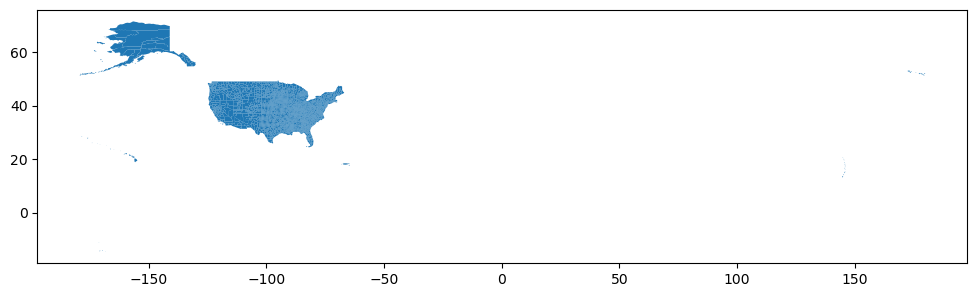

In [21]:
# d
counties.plot(figsize=(12,8))

In [22]:
# check for missing values
counties.isna().sum()

STATEFP        0
COUNTYFP       0
COUNTYNS       0
GEOID          0
GEOIDFQ        0
NAME           0
NAMELSAD       0
LSAD           0
CLASSFP        0
MTFCC          0
CSAFP       1894
CBSAFP      1320
METDIVFP    3096
FUNCSTAT       0
ALAND          0
AWATER         0
INTPTLAT       0
INTPTLON       0
geometry       0
dtype: int64

In [23]:
# summary of numeric columns
counties.describe()

,ALAND,AWATER
count,3.235000e+03,3.235000e+03
mean,2.832034e+09,2.199280e+08
std,9.185374e+09,1.225303e+09
min,8.209300e+04,0.000000e+00
25%,1.078472e+09,7.045018e+06
50%,1.561103e+09,1.958062e+07
75%,2.368033e+09,6.116941e+07
max,3.770553e+11,2.598963e+10


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [24]:
# Lowercase all column names
counties.columns = counties.columns.str.lower()
counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

In [25]:
# select all New York counties (FIPS code 36)
ny_counties = counties[counties['statefp'] == '36']
# quck check
ny_counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."


Text(0.5, 1.0, 'Counties in New York State')

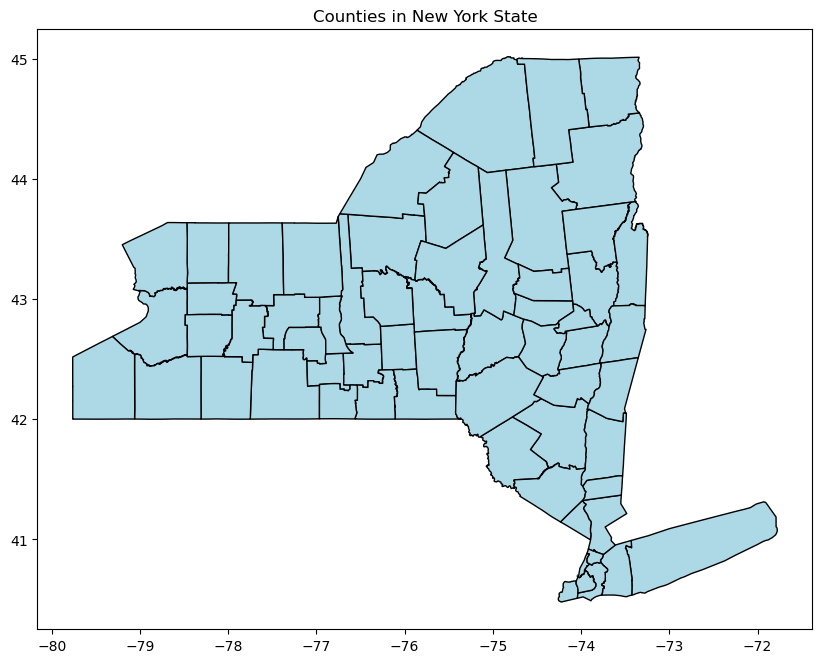

In [26]:
# plot New York counties
ny_counties.plot(figsize=(10, 10), edgecolor= 'black', color= 'lightblue')
plt.title("Counties in New York State")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [27]:
print(f"Unique county names in `ny_counties` {ny_counties['name'].unique()}")

Unique county names in `ny_counties` ['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [28]:
print(f"Unique county names in `spill_per_county` {spills_per_county['county'].unique()}")

Unique county names in `spill_per_county` ['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [29]:
diff_names_spills = np.setdiff1d(spills_per_county['county'], ny_counties['name']).tolist()
diff_names_spills


['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [30]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [31]:
diff_names_ny = np.setdiff1d(ny_counties['name'], spills_per_county['county']).tolist()
diff_names_ny

['St. Lawrence']

In [32]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [33]:
# e. 
int(spills_per_county.loc[
    spills_per_county['county'] == 'Tuscarora Indian Reservation','n_spills'
])

/tmp/ipykernel_290316/1948936386.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(spills_per_county.loc[


1

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [34]:
# update 'St Lawrence' to 'St. Lawrence'
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')
spills_per_county['county'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [35]:
# Rename column to 'county' for consistency
ny_counties = ny_counties.rename(columns={'name': 'county'})

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [36]:
# Merge counties and spills per county df
ny_counties = ny_counties.merge(spills_per_county, on='county', how='inner')
ny_counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",162
2,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",162



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [37]:
# Add a spill to Niagara 
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] +=1

ny_counties.loc[ny_counties['county'] == 'Niagara']

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
45,36,063,00974130,36063,0500000US36063,Niagara,Niagara County,06,H1,G4020,160,15380,None,A,1352876140,1598772310,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",89


## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



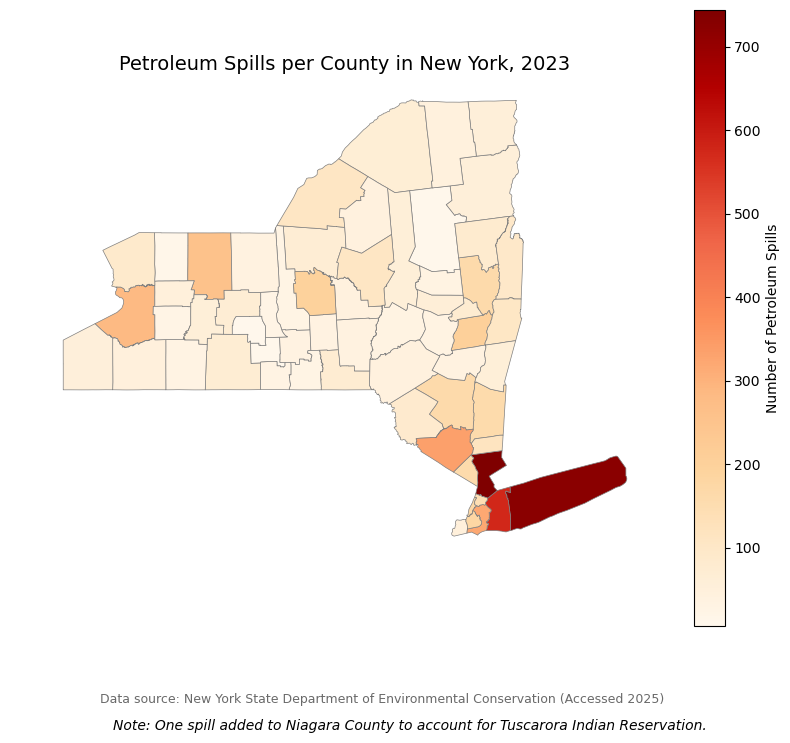

In [46]:
# Plot number of petroleum spill per county in the state of New York in 2023
fig, ax = plt.subplots(figsize=(10, 8))
ny_counties.plot(
column= 'n_spills',
cmap= 'OrRd',
legend= True,
edgecolor= 'gray',
linewidth= 0.5,
ax=ax,
legend_kwds={
        'label': "Number of Petroleum Spills", 
        'orientation': "vertical"              
    })
ax.set_title("Petroleum Spills per County in New York, 2023", fontsize=14)
ax.axis('off')
plt.annotate(
"Data source: New York State Department of Environmental Conservation (Accessed 2025)",
xy=(0.1, 0.05), xycoords= 'figure fraction', fontsize= 9, color= 'dimgray')
# Add note about Tuscarora correction
plt.figtext(
    0.5, -0.02,
    "Note: One spill added to Niagara County to account for Tuscarora Indian Reservation.",
    wrap=True, ha='center', fontsize=10, style='italic'
)
plt.show()

b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

The choropleth map displays the number of petroleum spills per count in New York in 2023. Darker shades of orange and red reprsent counties with a higher number of incidents, while shades indicate fewer spills. The map shows that petroleum spills are not evenly distributed across the state. Urban and industrialized areas such as Queen, King (Brooklyn), and Westchester counties show higher spill counts, likely due to denser infrastructure and transportation networks. In contrast, more rural counties such as Hamilton and Yates reprot few or no spills. 

From earlier data exploration, we know that Tuscarora Indian Resercation, which lies within Niagara County, was not included in the county shapefile used for the spatial join. To accurately represent that data, one additonal spill was manually aded to Niagara County, and this adjustment is noted in the map 
The map was created using GeopPandas and Matplotlib, with county geometries overlaid and color-coded based on the spill count. Data were sourced from the New York State Department of Environmental Conservation (accessed 2025). The map visualizes spatial varation in petroleum spills and highlights potential regions of environmental concern for monitoring and mitigation efforts. 

## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [39]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expected_data = pd.read_csv('data/q5d_df.csv').drop(columns='Unnamed: 0')
                    pd.testing.assert_frame_equal(expected_data, student_data)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q3(spills_per_county)
        Expecting nothing
        **********************************************************************
        Line 7, in q5d 0
        Failed example:
            test_q3(spills_per_county)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q5d 0[0]>", line 4, in test_q3
                pd.testing.assert_frame_equal(expected_data, student_data)
              File "/op